### Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc
sns.set_style("darkgrid")

In [2]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### Preparation

In [13]:
tools = pd.read_parquet('../data/tools.parquet')
fpmms = pd.read_parquet('../data/fpmms.parquet')
summary_traders = pd.read_parquet('../data/summary_profitability.parquet')


In [3]:
all_trades = pd.read_parquet('../data/all_trades_profitability.parquet')

In [15]:
all_trades.head()

trader_address  \
0  0x022b36c50b85b8ae7addfb8a35d76c59d5814834   
1  0x022b36c50b85b8ae7addfb8a35d76c59d5814834   
2  0x022b36c50b85b8ae7addfb8a35d76c59d5814834   
3  0x022b36c50b85b8ae7addfb8a35d76c59d5814834   
4  0x022b36c50b85b8ae7addfb8a35d76c59d5814834   

                                            trade_id  \
0  0x017947579ab51313c31fe1cc562c0f1726ec09c90x02...   
1  0x027f6bc849e273477f4a63085192714084917fcc0x02...   
2  0x027f6bc849e273477f4a63085192714084917fcc0x02...   
3  0x027f6bc849e273477f4a63085192714084917fcc0x02...   
4  0x027f6bc849e273477f4a63085192714084917fcc0x02...   

         creation_timestamp  \
0 2024-05-19 01:26:30+00:00   
1 2024-06-12 01:16:55+00:00   
2 2024-06-12 15:08:00+00:00   
3 2024-06-13 07:22:55+00:00   
4 2024-06-14 03:01:20+00:00   

                                               title market_status  \
0  Will Google's Pixel 9 lineup be officially rel...        CLOSED   
1  Will the 2D-animated Paramount Plus show 'Tale...        CLOSED   
2  Will the 2D-animated Paramount Plus show 'Tale...        CLOSED   
3  Will the 2D-animated Paramount Plus show 'Tale...        CLOSED   
4  Will the 2D-animated Paramount Plus show 'Tale...        CLOSED   

   collateral_amount outcome_index  trade_fee_amount  outcomes_tokens_traded  \
0              0.638             1             0.013                   1.206   
1              1.000             1             0.020                   1.840   
2              0.800             1             0.016                   1.518   
3              0.456             0             0.009                   1.003   
4              0.704             0             0.014                   1.198   

   current_answer  is_invalid  winning_trade  earnings  redeemed  \
0               1       False           True     1.206      True   
1               1       False           True     1.840      True   
2               1       False           True     1.518      True   
3               1       False          False     0.000      True   
4               1       False          False     0.000      True   

   redeemed_amount  num_mech_calls  mech_fee_amount  net_earnings    roi  
0            1.206               0            0.000         0.556  0.854  
1            1.840               3            0.030         0.790  0.752  
2            1.518               3            0.030         0.672  0.795  
3            0.000               3            0.030        -0.495 -1.000  
4            0.000               3            0.030        -0.748 -1.000

In [16]:
all_trades.tail()

trader_address  \
18936  0xc8929dd39bb5f685435ab16345929a47caacc46b   
18937  0xc8929dd39bb5f685435ab16345929a47caacc46b   
18938  0xc8929dd39bb5f685435ab16345929a47caacc46b   
18939  0xc8929dd39bb5f685435ab16345929a47caacc46b   
18940  0x7b2e78d4dfaaba045a167a70da285e30e8fca196   

                                                trade_id  \
18936  0xd068383c5d6d1466d10db660f33524c2725f8fb60xc8...   
18937  0xec5578e95c71ddbad6aabf8517dcd35cf53da4970xc8...   
18938  0xf2c74ef39065ee2e239bf8551aedddd6b2d6add70xc8...   
18939  0xfdf1a762eaae0a4472599f26aeafeae043b37d360xc8...   
18940  0xaf8fa4b8e04bbbee6903fede1d27b3aad25b468e0x7b...   

             creation_timestamp  \
18936 2024-05-22 19:05:00+00:00   
18937 2024-05-22 17:57:35+00:00   
18938 2024-05-22 20:00:05+00:00   
18939 2024-05-22 19:42:35+00:00   
18940 2024-07-05 09:10:40+00:00   

                                                   title market_status  \
18936  Will Elon Musk's Neuralink successfully test i...        CLOSED   
18937  Will Kevin Spacey return to acting by 25 May 2...        CLOSED   
18938  Will Donald Trump testify in the hush money ca...        CLOSED   
18939  Will a new Marvel Cinematic Universe (MCU) mov...        CLOSED   
18940  Will Vice President Kamala Harris be the Democ...        CLOSED   

       collateral_amount outcome_index  trade_fee_amount  \
18936              0.100             1             0.002   
18937              0.160             0             0.003   
18938              0.100             1             0.002   
18939              0.100             0             0.002   
18940              1.000             1             0.020   

       outcomes_tokens_traded  current_answer  is_invalid  winning_trade  \
18936                   0.200               1       False           True   
18937                   0.309               0       False           True   
18938                   0.200               1       False           True   
18939                   0.211               1       False          False   
18940                   1.717               1       False           True   

       earnings  redeemed  redeemed_amount  num_mech_calls  mech_fee_amount  \
18936     0.200     False            0.000               2            0.020   
18937     0.309     False            0.000               2            0.020   
18938     0.200     False            0.000               3            0.030   
18939     0.000     False            0.000               2            0.020   
18940     1.717     False            0.000               0            0.000   

       net_earnings    roi  
18936         0.078  0.640  
18937         0.126  0.686  
18938         0.068  0.518  
18939        -0.122 -1.000  
18940         0.697  0.684

In [4]:
all_trades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17067 entries, 0 to 17066
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   trader_address          17067 non-null  object             
 1   trade_id                17067 non-null  object             
 2   creation_timestamp      17067 non-null  datetime64[ns, UTC]
 3   title                   17067 non-null  object             
 4   market_status           17067 non-null  object             
 5   collateral_amount       17067 non-null  float64            
 6   outcome_index           17067 non-null  object             
 7   trade_fee_amount        17067 non-null  float64            
 8   outcomes_tokens_traded  17067 non-null  float64            
 9   current_answer          17067 non-null  int64              
 10  is_invalid              17067 non-null  bool               
 11  winning_trade           17067 non-null  b

In [8]:
all_trades.creation_timestamp.min()

Timestamp('2024-05-12 00:04:25+0000', tz='UTC')

In [18]:
all_trades.creation_timestamp.max()

Timestamp('2024-07-14 01:09:10+0000', tz='UTC')

In [9]:
all_trades.creation_timestamp.max()

Timestamp('2024-07-08 02:29:40+0000', tz='UTC')

In [4]:
print(tools.shape)
tools.request_block.min(), tools.request_block.max()

(339443, 22)


(28911882, 34138429)

In [19]:
print(tools.shape)
tools.request_block.min(), tools.request_block.max()

(89518, 22)


(33989007, 34993418)

### 1. Error analysis

Error analysis only starts from block 321. We weren't capturing the error message prior

In [5]:
tools.tool.unique()

array(['prediction-online', 'prediction-offline', 'normal-sme-generator',
       'strong-sme-generator', 'prediction-online-sme',
       'prediction-offline-sme', 'claude-prediction-offline', 'openai',
       'claude-prediction-online',
       'prediction-sentence-embedding-conservative',
       'prediction-online-summarized-info',
       'prediction-sentence-embedding-bold',
       'prediction-online-sum-url-content',
       'openai-gpt-3.5-turbo-instruct',
       'resolve-market-reasoning-gpt-3.5-turbo',
       'resolve-market-reasoning-gpt-4', 'prediction-request-rag',
       'prediction-request-reasoning',
       'prediction-request-reasoning-claude', 'prediction-url-cot-claude',
       'prediction-request-rag-claude', 'native_transfer_request',
       'native_transfer'], dtype=object)

In [5]:
tools.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339443 entries, 0 to 339442
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   request_id               339443 non-null  object 
 1   request_block            339443 non-null  int64  
 2   prompt_request           339443 non-null  object 
 3   tool                     339443 non-null  object 
 4   nonce                    339443 non-null  object 
 5   trader_address           339443 non-null  object 
 6   deliver_block            339443 non-null  int64  
 7   error                    339440 non-null  float64
 8   error_message            56715 non-null   object 
 9   prompt_response          252711 non-null  object 
 10  mech_address             286960 non-null  object 
 11  p_yes                    282717 non-null  float64
 12  p_no                     282717 non-null  float64
 13  confidence               282717 non-null  float64
 14  info

In [6]:
tools.request_time.min()

'2023-07-12 11:58:40'

In [4]:
inc_tools = [
    'prediction-online', 
    'prediction-offline', 
    'claude-prediction-online', 
    'claude-prediction-offline', 
    'prediction-offline-sme',
    'prediction-online-sme',
    'prediction-request-rag',
    'prediction-request-reasoning',
    'prediction-url-cot-claude', 
    'prediction-request-rag-claude',
    'prediction-request-reasoning-claude'
]

In [8]:
# include only tools that are in inc_tools
tools_inc = tools[tools['tool'].isin(inc_tools)]

In [9]:
error = tools_inc.groupby(['tool', 'request_month_year_week', 'error']).size().unstack().fillna(0).reset_index()
error["error_perc"] = (error[1] / (error[0] + error[1])) * 100
error["total_requests"] = error[0] + error[1]

In [13]:
error_total = (
    error.groupby("request_month_year_week")
    .agg({"total_requests": "sum", 1: "sum", 0: "sum"})
    .reset_index()
)
error_total["error_perc"] = (error_total[1] / error_total["total_requests"]) * 100
error_total.columns = error_total.columns.astype(str)
error_total["error_perc"] = error_total["error_perc"].apply(lambda x: round(x, 4))

In [15]:
error_total.head()

error request_month_year_week  total_requests       1       0  error_perc
0       2023-07-10/2023-07-16          44.000  31.000  13.000      70.454
1       2023-07-17/2023-07-23          56.000   0.000  56.000       0.000
2       2023-07-24/2023-07-30          48.000   5.000  43.000      10.417
3       2023-07-31/2023-08-06         922.000 203.000 719.000      22.017
4       2023-08-07/2023-08-13         313.000   9.000 304.000       2.875

Text(0.5, 1.0, 'Error Percentage by Month-Year')

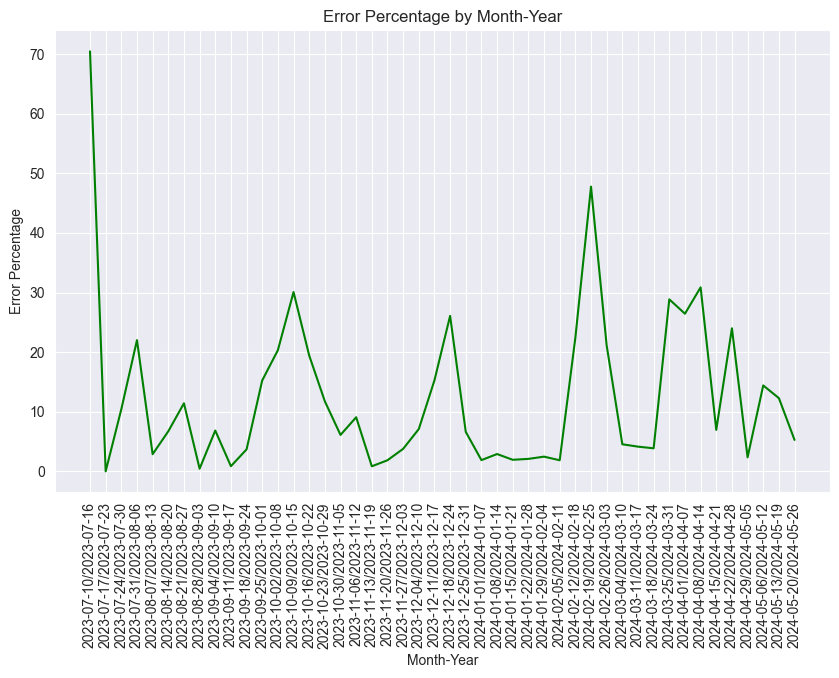

In [25]:
plt.figure(figsize=(10, 6))
ax=sns.lineplot(error_total, x='request_month_year_week', y='error_perc',color="green")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.xlabel('Month-Year')
plt.ylabel('Error Percentage')
plt.title('Error Percentage by Month-Year')

In [27]:
error[error['request_month_year_week'] == '2024-05-20/2024-05-26'].groupby('tool').agg({'error_perc': 'mean', 'total_requests': 'sum'}).sort_values('error_perc', ascending=False)

error                                error_perc  total_requests
tool                                                           
prediction-request-rag-claude            13.498        1704.000
prediction-request-rag                   12.041         490.000
prediction-online-sme                     9.076        2457.000
prediction-online                         4.769        2516.000
prediction-request-reasoning              3.247        5883.000
prediction-request-reasoning-claude       1.408         639.000
claude-prediction-offline                 0.000         107.000
claude-prediction-online                  0.000         241.000
prediction-offline                        0.000        1453.000
prediction-url-cot-claude                 0.000         293.000

In [30]:
# clude-prediction-offline
claude_prediction_offline = error[error['tool'] == 'claude-prediction-offline']
claude_prediction_offline = claude_prediction_offline.sort_values('request_month_year_week', ascending=False)
claude_prediction_offline.head()

error                       tool  request_month_year_week   0.000  1.000  \
19     claude-prediction-offline    2024-05-20/2024-05-26 107.000  0.000   
18     claude-prediction-offline    2024-05-13/2024-05-19 203.000  0.000   
17     claude-prediction-offline    2024-05-06/2024-05-12 156.000  0.000   
16     claude-prediction-offline    2024-04-29/2024-05-05 531.000  0.000   
15     claude-prediction-offline    2024-04-22/2024-04-28 816.000  5.000   

error   error_perc   total_requests  
19           0.000          107.000  
18           0.000          203.000  
17           0.000          156.000  
16           0.000          531.000  
15           0.609          821.000

In [31]:
# claude-prediction-online
claude_prediction_online = error[error['tool'] == 'claude-prediction-online']
claude_prediction_online = claude_prediction_online.sort_values('request_month_year_week', ascending=False)
claude_prediction_online.head()

error                      tool  request_month_year_week    0.000   1.000  \
54     claude-prediction-online    2024-05-20/2024-05-26  241.000   0.000   
53     claude-prediction-online    2024-05-13/2024-05-19   37.000   0.000   
52     claude-prediction-online    2024-05-06/2024-05-12  176.000   0.000   
51     claude-prediction-online    2024-04-29/2024-05-05  192.000   0.000   
50     claude-prediction-online    2024-04-22/2024-04-28 1937.000 155.000   

error   error_perc   total_requests  
54           0.000          241.000  
53           0.000           37.000  
52           0.000          176.000  
51           0.000          192.000  
50           7.409         2092.000

In [32]:
# prediction-offline
prediction_offline = error[error['tool'] == 'prediction-offline']
prediction_offline = prediction_offline.sort_values('request_month_year_week', ascending=False)
prediction_offline.head()


error                tool  request_month_year_week    0.000   1.000  \
84     prediction-offline    2024-05-20/2024-05-26 1453.000   0.000   
83     prediction-offline    2024-05-13/2024-05-19 4270.000   1.000   
82     prediction-offline    2024-05-06/2024-05-12 2500.000   0.000   
81     prediction-offline    2024-04-29/2024-05-05 1825.000   2.000   
80     prediction-offline    2024-04-22/2024-04-28  381.000 375.000   

error   error_perc   total_requests  
84           0.000         1453.000  
83           0.023         4271.000  
82           0.000         2500.000  
81           0.109         1827.000  
80          49.603          756.000

In [33]:
# prediction-online
prediction_online = error[error['tool'] == 'prediction-online']
prediction_online = prediction_online.sort_values('request_month_year_week', ascending=False)
prediction_online.head()

error               tool  request_month_year_week    0.000   1.000  \
139    prediction-online    2024-05-20/2024-05-26 2396.000 120.000   
138    prediction-online    2024-05-13/2024-05-19 2642.000 393.000   
137    prediction-online    2024-05-06/2024-05-12 2840.000 266.000   
136    prediction-online    2024-04-29/2024-05-05 2155.000  24.000   
135    prediction-online    2024-04-22/2024-04-28  252.000 153.000   

error   error_perc   total_requests  
139          4.769         2516.000  
138         12.949         3035.000  
137          8.564         3106.000  
136          1.101         2179.000  
135         37.778          405.000

In [34]:
# prediction-offline-sme
prediction_offline_sme = error[error['tool'] == 'prediction-offline-sme']
prediction_offline_sme = prediction_offline_sme.sort_values('request_month_year_week', ascending=False)
prediction_offline_sme.head()

error                    tool  request_month_year_week   0.000  1.000  \
104    prediction-offline-sme    2024-04-29/2024-05-05   8.000  0.000   
103    prediction-offline-sme    2024-04-22/2024-04-28 159.000  2.000   
102    prediction-offline-sme    2024-04-15/2024-04-21 717.000  2.000   
101    prediction-offline-sme    2024-04-08/2024-04-14   4.000  0.000   
100    prediction-offline-sme    2024-04-01/2024-04-07 197.000  1.000   

error   error_perc   total_requests  
104          0.000            8.000  
103          1.242          161.000  
102          0.278          719.000  
101          0.000            4.000  
100          0.505          198.000

In [35]:
# prediction-online-sme
prediction_online_sme = error[error['tool'] == 'prediction-online-sme']
prediction_online_sme = prediction_online_sme.sort_values('request_month_year_week', ascending=False)
prediction_online_sme.head()

error                   tool  request_month_year_week    0.000    1.000  \
175    prediction-online-sme    2024-05-20/2024-05-26 2234.000  223.000   
174    prediction-online-sme    2024-05-13/2024-05-19 3141.000  668.000   
173    prediction-online-sme    2024-05-06/2024-05-12 3799.000  562.000   
172    prediction-online-sme    2024-04-29/2024-05-05 2534.000    6.000   
171    prediction-online-sme    2024-04-22/2024-04-28 2679.000 1075.000   

error   error_perc   total_requests  
175          9.076         2457.000  
174         17.537         3809.000  
173         12.887         4361.000  
172          0.236         2540.000  
171         28.636         3754.000

In [36]:
# prediction-request-rag
prediction_request_rag = error[error['tool'] == 'prediction-request-rag']
prediction_request_rag = prediction_request_rag.sort_values('request_month_year_week', ascending=False)
prediction_request_rag.head()

error                    tool  request_month_year_week    0.000   1.000  \
188    prediction-request-rag    2024-05-20/2024-05-26  431.000  59.000   
187    prediction-request-rag    2024-05-13/2024-05-19  355.000  55.000   
186    prediction-request-rag    2024-05-06/2024-05-12  470.000 125.000   
185    prediction-request-rag    2024-04-29/2024-05-05  544.000   0.000   
184    prediction-request-rag    2024-04-22/2024-04-28 2011.000 881.000   

error   error_perc   total_requests  
188         12.041          490.000  
187         13.415          410.000  
186         21.008          595.000  
185          0.000          544.000  
184         30.463         2892.000

In [37]:
# prediction-request-reasoning-claude
prediction_request_reasoning_claude = error[error['tool'] == 'prediction-request-reasoning-claude']
prediction_request_reasoning_claude = prediction_request_reasoning_claude.sort_values('request_month_year_week', ascending=False)
prediction_request_reasoning_claude.head()

error                                 tool  request_month_year_week    0.000  \
214    prediction-request-reasoning-claude    2024-05-20/2024-05-26  630.000   
213    prediction-request-reasoning-claude    2024-05-13/2024-05-19  309.000   
212    prediction-request-reasoning-claude    2024-05-06/2024-05-12  478.000   
211    prediction-request-reasoning-claude    2024-04-29/2024-05-05  218.000   
210    prediction-request-reasoning-claude    2024-04-22/2024-04-28 2053.000   

error   1.000   error_perc   total_requests  
214     9.000        1.408          639.000  
213   205.000       39.883          514.000  
212    54.000       10.150          532.000  
211     8.000        3.540          226.000  
210   575.000       21.880         2628.000

In [38]:
prediction_request_rag_claude = error[error['tool'] == 'prediction-request-rag-claude']
prediction_request_rag_claude = prediction_request_rag_claude.sort_values('request_month_year_week', ascending=False)
prediction_request_rag_claude.head()

error                           tool  request_month_year_week    0.000  \
196    prediction-request-rag-claude    2024-05-20/2024-05-26 1474.000   
195    prediction-request-rag-claude    2024-05-13/2024-05-19 2378.000   
194    prediction-request-rag-claude    2024-05-06/2024-05-12 2850.000   
193    prediction-request-rag-claude    2024-04-29/2024-05-05 1313.000   
192    prediction-request-rag-claude    2024-04-22/2024-04-28 1113.000   

error   1.000   error_perc   total_requests  
196   230.000       13.498         1704.000  
195   274.000       10.332         2652.000  
194   777.000       21.423         3627.000  
193     8.000        0.606         1321.000  
192   345.000       23.663         1458.000

In [39]:
prediction_url_cot_claude = error[error['tool'] == 'prediction-url-cot-claude']
prediction_url_cot_claude = prediction_url_cot_claude.sort_values('request_month_year_week', ascending=False)
prediction_url_cot_claude.head()

error                       tool  request_month_year_week    0.000  1.000  \
222    prediction-url-cot-claude    2024-05-20/2024-05-26  293.000  0.000   
221    prediction-url-cot-claude    2024-05-13/2024-05-19   93.000  0.000   
220    prediction-url-cot-claude    2024-05-06/2024-05-12  225.000  0.000   
219    prediction-url-cot-claude    2024-04-29/2024-05-05  270.000  0.000   
218    prediction-url-cot-claude    2024-04-22/2024-04-28 1506.000 65.000   

error   error_perc   total_requests  
222          0.000          293.000  
221          0.000           93.000  
220          0.000          225.000  
219          0.000          270.000  
218          4.137         1571.000

In [7]:
del tools
del tools_inc
del error
del error_total

gc.collect()

NameError: name 'tools_inc' is not defined

### 2. Win analysis

In [45]:
# only include non error requests
tools_non_error = tools_inc[tools_inc['error'] != 1]
tools_non_error['currentAnswer'].replace('no', 'No', inplace=True)
tools_non_error['currentAnswer'].replace('yes', 'Yes', inplace=True)
tools_non_error = tools_non_error[tools_non_error['currentAnswer'].isin(['Yes', 'No'])]
tools_non_error = tools_non_error[tools_non_error['vote'].isin(['Yes', 'No'])]

In [46]:
tools_non_error['win'] = tools_non_error['currentAnswer'] == tools_non_error['vote']
tools_non_error['win'] = tools_non_error['win'].astype(int)

In [47]:
wins = tools_non_error.groupby(['tool', 'request_month_year_week', 'win']).size().unstack().fillna(0)
wins['win_perc'] = (wins[1] / (wins[0] + wins[1]))*100
wins.reset_index(inplace=True)
wins['total_request'] = wins[0] + wins[1]

In [48]:
wins['tool'].unique()

array(['claude-prediction-offline', 'claude-prediction-online',
       'prediction-offline', 'prediction-offline-sme',
       'prediction-online', 'prediction-online-sme',
       'prediction-request-rag', 'prediction-request-rag-claude',
       'prediction-request-reasoning',
       'prediction-request-reasoning-claude', 'prediction-url-cot-claude'],
      dtype=object)

In [49]:
wins.groupby('request_month_year_week').agg({
    0: 'sum',
    1: 'sum',
    'win_perc': 'mean',
    'total_request': 'sum'
})

win                            0        1  win_perc  total_request
request_month_year_week                                           
2023-07-17/2023-07-23      1.000    1.000    50.000          2.000
2023-07-24/2023-07-30     12.000   12.000    50.000         24.000
2023-07-31/2023-08-06    360.000  229.000    41.979        589.000
2023-08-07/2023-08-13    177.000  110.000    44.123        287.000
2023-08-14/2023-08-20    784.000  559.000    41.623       1343.000
2023-08-21/2023-08-27    596.000  502.000    45.719       1098.000
2023-08-28/2023-09-03    958.000  502.000    34.384       1460.000
2023-09-04/2023-09-10   1609.000 1418.000    46.845       3027.000
2023-09-11/2023-09-17   1171.000 1380.000    54.096       2551.000
2023-09-18/2023-09-24   2150.000 2307.000    60.968       4457.000
2023-09-25/2023-10-01    992.000  817.000    47.635       1809.000
2023-10-02/2023-10-08   1625.000 1842.000    54.240       3467.000
2023-10-09/2023-10-15   1594.000 2096.000    57.281       3690.000
2023-10-16/2023-10-22   1291.000 1623.000    55.496       2914.000
2023-10-23/2023-10-29   1018.000 1084.000    50.802       2102.000
2023-10-30/2023-11-05    541.000  825.000    64.848       1366.000
2023-11-06/2023-11-12   1545.000 1776.000    69.014       3321.000
2023-11-13/2023-11-19   1825.000 2056.000    55.202       3881.000
2023-11-20/2023-11-26   1567.000 1874.000    58.482       3441.000
2023-11-27/2023-12-03   1555.000 1773.000    67.721       3328.000
2023-12-04/2023-12-10   1245.000 1470.000    33.705       2715.000
2023-12-11/2023-12-17   1462.000 1788.000    52.404       3250.000
2023-12-18/2023-12-24   1332.000 1557.000    46.687       2889.000
2023-12-25/2023-12-31   1397.000 1257.000    48.222       2654.000
2024-01-01/2024-01-07   2159.000 1713.000    43.436       3872.000
2024-01-08/2024-01-14   1034.000  890.000    41.597       1924.000
2024-01-15/2024-01-21   2228.000 1758.000    40.827       3986.000
2024-01-22/2024-01-28   2036.000 1970.000    31.617       4006.000
2024-01-29/2024-02-04   2303.000 1791.000    37.106       4094.000
2024-02-05/2024-02-11   2149.000 2189.000    49.808       4338.000
2024-02-12/2024-02-18   1979.000 1956.000    55.949       3935.000
2024-02-19/2024-02-25   1788.000 2002.000    57.697       3790.000
2024-02-26/2024-03-03   2299.000 2350.000    42.051       4649.000
2024-03-04/2024-03-10   4523.000 3500.000    44.989       8023.000
2024-03-11/2024-03-17   4516.000 4705.000    56.713       9221.000
2024-03-18/2024-03-24   5561.000 5581.000    52.903      11142.000
2024-03-25/2024-03-31   5200.000 6965.000    54.644      12165.000
2024-04-01/2024-04-07   2923.000 4258.000    61.323       7181.000
2024-04-08/2024-04-14   1331.000 3412.000    69.522       4743.000

In [50]:
# select only claude-prediction-online and plot request_month_year_week vs win_perc
claude_prediction_online = wins[wins['tool'] == 'claude-prediction-online']
claude_prediction_online = claude_prediction_online[['request_month_year_week', 'win_perc', 'total_request']]
claude_prediction_online = claude_prediction_online.sort_values(by='request_month_year_week')

claude_prediction_online.head()

win request_month_year_week  win_perc  total_request
11    2023-09-18/2023-09-24   100.000          1.000
12    2023-09-25/2023-10-01    58.333         48.000
13    2023-10-02/2023-10-08    61.783        157.000
14    2023-10-09/2023-10-15    60.588        680.000
15    2023-10-16/2023-10-22    58.791        364.000
16    2023-10-23/2023-10-29    47.143         70.000
17    2023-10-30/2023-11-05    67.647         34.000
18    2023-11-20/2023-11-26   100.000          1.000
19    2023-11-27/2023-12-03    57.143          7.000
20    2023-12-04/2023-12-10    66.667          6.000
21    2023-12-11/2023-12-17    50.000          2.000
22    2023-12-25/2023-12-31    55.814         43.000
23    2024-01-01/2024-01-07    28.400        250.000
24    2024-01-08/2024-01-14    35.789        190.000
25    2024-01-15/2024-01-21    36.986        292.000
26    2024-01-22/2024-01-28    45.387        271.000
27    2024-01-29/2024-02-04    29.555        247.000
28    2024-02-05/2024-02-11    49.064        267.000
29    2024-02-12/2024-02-18    63.300        297.000
30    2024-02-19/2024-02-25    65.362        690.000
31    2024-03-18/2024-03-24    71.575        781.000
32    2024-03-25/2024-03-31    69.052       3648.000
33    2024-04-01/2024-04-07    60.991       2402.000
34    2024-04-08/2024-04-14    62.205        635.000

In [51]:
# select only claude-prediction-offline and plot request_month_year_week vs win_perc
claude_prediction_offline = wins[wins['tool'] == 'claude-prediction-offline']
claude_prediction_offline = claude_prediction_offline[['request_month_year_week', 'win_perc', 'total_request']]
claude_prediction_offline = claude_prediction_offline.sort_values(by='request_month_year_week')

claude_prediction_offline.head()

win request_month_year_week  win_perc  total_request
0     2023-09-18/2023-09-24    16.667          6.000
1     2023-09-25/2023-10-01    53.205        156.000
2     2023-10-02/2023-10-08    53.333        285.000
3     2023-10-09/2023-10-15    60.477        377.000
4     2023-10-16/2023-10-22    57.854        522.000
5     2023-10-23/2023-10-29    56.383        376.000
6     2023-10-30/2023-11-05    72.000         75.000
7     2023-11-06/2023-11-12   100.000          1.000
8     2023-11-13/2023-11-19   100.000          2.000
9     2023-12-18/2023-12-24    20.000          5.000
10    2024-03-25/2024-03-31   100.000          2.000

In [52]:
# select only prediction-online and plot request_month_year_week vs win_perc
prediction_online = wins[wins['tool'] == 'prediction-online']
prediction_online = prediction_online[['request_month_year_week', 'win_perc', 'total_request']]
prediction_online = prediction_online.sort_values(by='request_month_year_week')

prediction_online.head()

win request_month_year_week  win_perc  total_request
72    2023-07-17/2023-07-23    50.000          2.000
73    2023-07-24/2023-07-30    50.000         24.000
74    2023-07-31/2023-08-06    38.306        543.000
75    2023-08-07/2023-08-13    38.246        285.000
76    2023-08-14/2023-08-20    41.623       1343.000
77    2023-08-21/2023-08-27    45.719       1098.000
78    2023-08-28/2023-09-03    34.384       1460.000
79    2023-09-04/2023-09-10    46.845       3027.000
80    2023-09-11/2023-09-17    54.096       2551.000
81    2023-09-18/2023-09-24    51.602       4246.000
82    2023-09-25/2023-10-01    43.876        743.000
83    2023-10-02/2023-10-08    50.538        837.000
84    2023-10-09/2023-10-15    50.976        973.000
85    2023-10-16/2023-10-22    56.146        903.000
86    2023-10-23/2023-10-29    48.822        594.000
87    2023-10-30/2023-11-05    60.392        664.000
88    2023-11-06/2023-11-12    52.533       1757.000
89    2023-11-13/2023-11-19    53.892       2004.000
90    2023-11-20/2023-11-26    53.202       1780.000
91    2023-11-27/2023-12-03    54.253       1058.000
92    2023-12-04/2023-12-10    47.500         80.000
93    2023-12-11/2023-12-17    52.174         23.000
94    2023-12-18/2023-12-24    69.863         73.000
95    2023-12-25/2023-12-31    41.509         53.000
96    2024-01-01/2024-01-07     0.000          2.000
97    2024-01-22/2024-01-28     0.000          1.000
98    2024-03-25/2024-03-31     0.000          1.000

In [53]:
# select only prediction-offline and plot request_month_year_week vs win_perc
prediction_offline = wins[wins['tool'] == 'prediction-offline']
prediction_offline = prediction_offline[['request_month_year_week', 'win_perc', 'total_request']]
prediction_offline = prediction_offline.sort_values(by='request_month_year_week')

prediction_offline

win request_month_year_week  win_perc  total_request
35    2023-07-31/2023-08-06    45.652         46.000
36    2023-08-07/2023-08-13    50.000          2.000
37    2023-09-18/2023-09-24    51.128        133.000
38    2023-09-25/2023-10-01    36.864        236.000
39    2023-10-02/2023-10-08    50.077        651.000
40    2023-10-09/2023-10-15    52.392        418.000
41    2023-10-16/2023-10-22    52.658        395.000
42    2023-10-23/2023-10-29    45.503        189.000
43    2023-10-30/2023-11-05    75.000         40.000
44    2023-11-13/2023-11-19    50.000          2.000
45    2023-11-20/2023-11-26    33.333          3.000
46    2023-11-27/2023-12-03    88.235         17.000
47    2023-12-04/2023-12-10     0.000          1.000
48    2023-12-18/2023-12-24    50.000          6.000
49    2024-01-01/2024-01-07   100.000          1.000
50    2024-03-11/2024-03-17    62.808        406.000
51    2024-03-18/2024-03-24    54.453       2448.000
52    2024-03-25/2024-03-31    58.729       2360.000
53    2024-04-01/2024-04-07    57.055        652.000
54    2024-04-08/2024-04-14    75.641        468.000

In [54]:
# select only prediction-offline-sme and plot request_month_year_week vs win_perc
prediction_offline_sme = wins[wins['tool'] == 'prediction-offline-sme']
prediction_offline_sme = prediction_offline_sme[['request_month_year_week', 'win_perc', 'total_request']]
prediction_offline_sme = prediction_offline_sme.sort_values(by='request_month_year_week')

prediction_offline_sme

win request_month_year_week  win_perc  total_request
55    2023-09-18/2023-09-24    83.333          6.000
56    2023-09-25/2023-10-01    45.545        303.000
57    2023-10-02/2023-10-08    54.208        701.000
58    2023-10-09/2023-10-15    58.883        591.000
59    2023-10-16/2023-10-22    54.407        329.000
60    2023-10-23/2023-10-29    51.064        517.000
61    2023-10-30/2023-11-05    60.265        302.000
62    2023-11-13/2023-11-19    20.000         10.000
63    2023-11-20/2023-11-26    50.000         14.000
64    2023-11-27/2023-12-03    86.667         15.000
65    2023-12-04/2023-12-10     0.000          1.000
66    2023-12-18/2023-12-24    40.000          5.000
67    2024-03-11/2024-03-17    60.947        169.000
68    2024-03-18/2024-03-24    44.016        493.000
69    2024-03-25/2024-03-31    60.000         10.000
70    2024-04-01/2024-04-07    61.039         77.000
71    2024-04-08/2024-04-14    50.000          2.000

In [55]:
# select only prediction-online-sme and plot request_month_year_week vs win_perc
prediction_online_sme = wins[wins['tool'] == 'prediction-online-sme']
prediction_online_sme = prediction_online_sme[['request_month_year_week', 'win_perc', 'total_request']]
prediction_online_sme = prediction_online_sme.sort_values(by='request_month_year_week')

prediction_online_sme.head()

win request_month_year_week  win_perc  total_request
99    2023-09-18/2023-09-24    63.077         65.000
100   2023-09-25/2023-10-01    47.988        323.000
101   2023-10-02/2023-10-08    55.502        836.000
102   2023-10-09/2023-10-15    60.369        651.000
103   2023-10-16/2023-10-22    53.117        401.000
104   2023-10-23/2023-10-29    55.899        356.000
105   2023-10-30/2023-11-05    53.785        251.000
106   2023-11-06/2023-11-12    54.511       1563.000
107   2023-11-13/2023-11-19    52.120       1863.000
108   2023-11-20/2023-11-26    55.873       1643.000
109   2023-11-27/2023-12-03    52.308       2231.000
110   2023-12-04/2023-12-10    54.359       2627.000
111   2023-12-11/2023-12-17    55.039       3225.000
112   2023-12-18/2023-12-24    53.571       2800.000
113   2023-12-25/2023-12-31    47.342       2558.000
114   2024-01-01/2024-01-07    45.344       3619.000
115   2024-01-08/2024-01-14    47.405       1734.000
116   2024-01-15/2024-01-21    44.667       3694.000
117   2024-01-22/2024-01-28    49.464       3734.000
118   2024-01-29/2024-02-04    44.658       3847.000
119   2024-02-05/2024-02-11    50.553       4071.000
120   2024-02-12/2024-02-18    48.598       3638.000
121   2024-02-19/2024-02-25    50.032       3100.000
122   2024-02-26/2024-03-03    51.717       4368.000
123   2024-03-04/2024-03-10    54.806       3454.000
124   2024-03-11/2024-03-17    55.848       3044.000
125   2024-03-18/2024-03-24    48.639       2535.000
126   2024-03-25/2024-03-31    41.345       1398.000
127   2024-04-01/2024-04-07    59.435       1097.000
128   2024-04-08/2024-04-14    68.281        413.000

In [56]:
# select only prediction-request-rag and plot request_month_year_week vs win_perc
prediction_request_rag = wins[wins['tool'] == 'prediction-request-rag']
prediction_request_rag = prediction_request_rag[['request_month_year_week', 'win_perc', 'total_request']]
prediction_request_rag = prediction_request_rag.sort_values(by='request_month_year_week')

prediction_request_rag.head()

win request_month_year_week  win_perc  total_request
129   2024-02-26/2024-03-03    32.384        281.000
130   2024-03-04/2024-03-10    35.172       4569.000
131   2024-03-11/2024-03-17    47.251       5602.000
132   2024-03-18/2024-03-24    45.834       4885.000
133   2024-03-25/2024-03-31    51.273       4006.000
134   2024-04-01/2024-04-07    57.021       1289.000
135   2024-04-08/2024-04-14    70.376        692.000

In [57]:
prediction_request_reasoning = wins[wins['tool'] == 'prediction-request-reasoning']
prediction_request_reasoning = prediction_request_reasoning[['request_month_year_week', 'win_perc', 'total_request']]
prediction_request_reasoning = prediction_request_reasoning.sort_values(by='request_month_year_week')

prediction_request_reasoning

win request_month_year_week  win_perc  total_request
138   2024-03-25/2024-03-31    56.757        740.000
139   2024-04-01/2024-04-07    58.025       1458.000
140   2024-04-08/2024-04-14    73.679       1003.000

In [58]:
prediction_request_reasoning_claude = wins[wins['tool'] == 'prediction-request-reasoning-claude']
prediction_request_reasoning_claude = prediction_request_reasoning_claude[['request_month_year_week', 'win_perc', 'total_request']]
prediction_request_reasoning_claude = prediction_request_reasoning_claude.sort_values(by='request_month_year_week')

prediction_request_reasoning_claude

win request_month_year_week  win_perc  total_request
141   2024-04-01/2024-04-07    68.387        155.000
142   2024-04-08/2024-04-14    78.514        619.000

In [59]:
prediction_request_rag_claude = wins[wins['tool'] == 'prediction-request-rag-claude']
prediction_request_rag_claude = prediction_request_rag_claude[['request_month_year_week', 'win_perc', 'total_request']]
prediction_request_rag_claude = prediction_request_rag_claude.sort_values(by='request_month_year_week')

prediction_request_rag_claude

win request_month_year_week  win_perc  total_request
136   2024-04-01/2024-04-07    68.627         51.000
137   2024-04-08/2024-04-14    74.184        337.000

In [60]:
prediction_url_cot_claude = wins[wins['tool'] == 'prediction-url-cot-claude']
prediction_url_cot_claude = prediction_url_cot_claude[['request_month_year_week', 'win_perc', 'total_request']]
prediction_url_cot_claude = prediction_url_cot_claude.sort_values(by='request_month_year_week')

prediction_url_cot_claude.head()

win request_month_year_week  win_perc  total_request
143   2024-04-08/2024-04-14    72.822        574.000

### 3. Profitability analysis

In [20]:
all_trades['creation_timestamp'] = pd.to_datetime(all_trades['creation_timestamp'])
all_trades = all_trades[all_trades['current_answer'].isin([0., 1., -1.])].reset_index(drop=True)

In [21]:
print(f"Number of traders: {len(summary_traders):,}")
print(f"Number of trades: {all_trades['trade_id'].nunique():,}")

Number of traders: 184
Number of trades: 18,941


Text(0, 0.5, 'Number of trades')

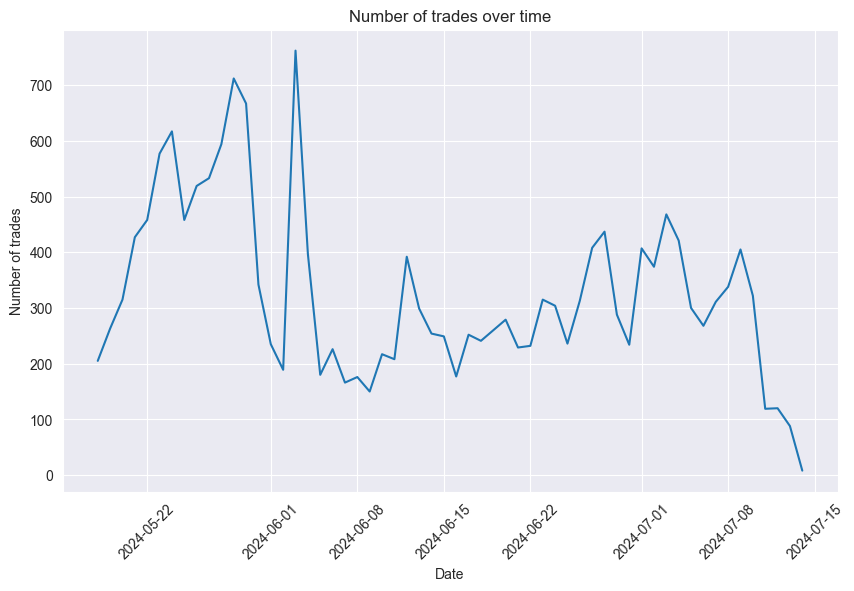

In [22]:
# plot num trades over time
plt.figure(figsize=(10,6))
all_trades['creation_timestamp'].dt.date.value_counts().sort_index().plot(title='Number of trades over time')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Number of trades')

Text(0, 0.5, 'Number of trades')

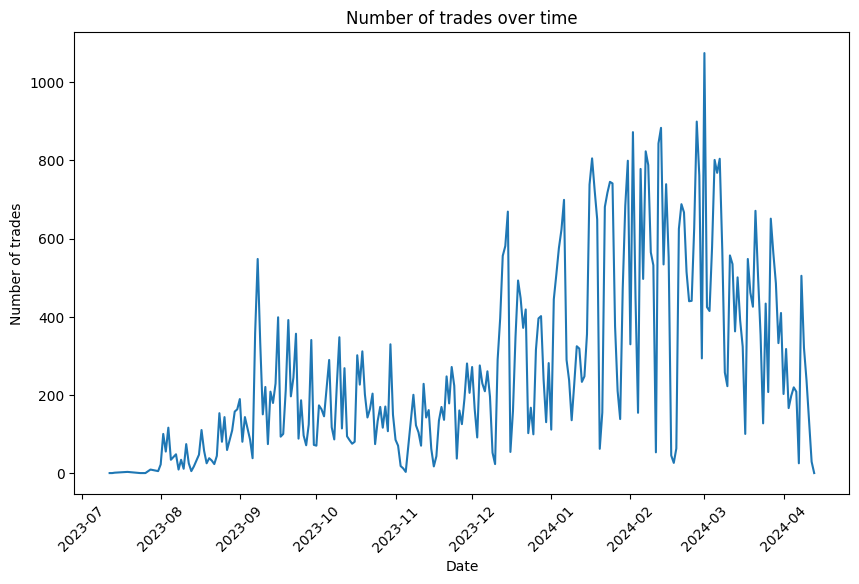

In [63]:
# plot num trades over time
plt.figure(figsize=(10,6))
all_trades['creation_timestamp'].dt.date.value_counts().sort_index().plot(title='Number of trades over time')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Number of trades')

In [23]:
print(all_trades['creation_timestamp'].min(), all_trades['creation_timestamp'].max())
all_trades['month_year'] = all_trades['creation_timestamp'].dt.to_period('M')
all_trades['month_year_week'] = all_trades['creation_timestamp'].dt.to_period('W')
all_trades['winning_trade'] = all_trades['winning_trade'].astype(int)

2024-05-18 00:25:10+00:00 2024-07-14 01:09:10+00:00


In [65]:
all_trades.columns

Index(['trader_address', 'trade_id', 'creation_timestamp', 'title',
       'market_status', 'collateral_amount', 'outcome_index',
       'trade_fee_amount', 'outcomes_tokens_traded', 'current_answer',
       'is_invalid', 'winning_trade', 'earnings', 'redeemed',
       'redeemed_amount', 'num_mech_calls', 'mech_fee_amount', 'net_earnings',
       'roi', 'month_year', 'month_year_week'],
      dtype='object')

In [66]:
all_trades.groupby(['month_year'])['winning_trade'].sum() / all_trades.groupby(['month_year'])['winning_trade'].count()

month_year
2023-07   0.385
2023-08   0.473
2023-09   0.442
2023-10   0.497
2023-11   0.488
2023-12   0.498
2024-01   0.470
2024-02   0.489
2024-03   0.499
2024-04   0.513
Freq: M, Name: winning_trade, dtype: float64

In [24]:
all_trades.groupby(['month_year'])['winning_trade'].sum() / all_trades.groupby(['month_year'])['winning_trade'].count()

month_year
2024-05   0.547
2024-06   0.576
2024-07   0.575
Freq: M, Name: winning_trade, dtype: float64

<Axes: title={'center': 'Winning trade percentage over time'}, xlabel='month_year_week'>

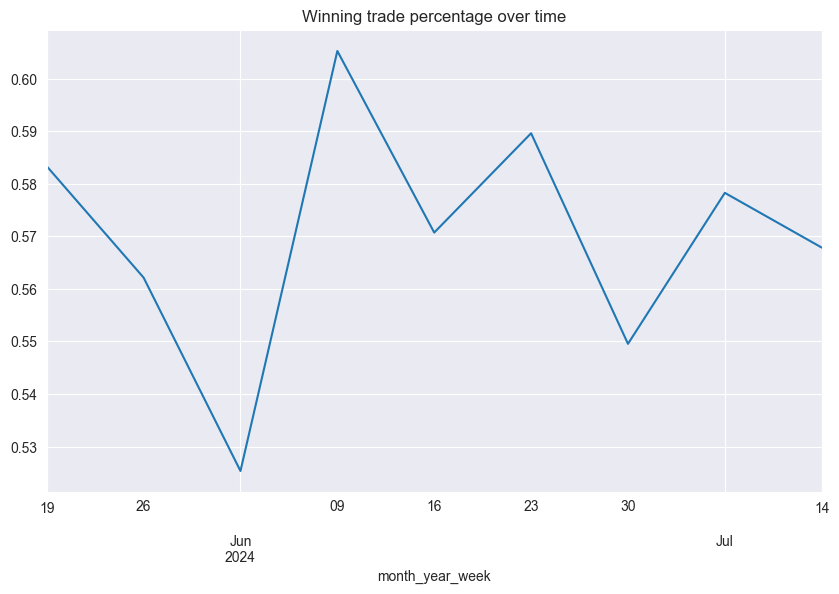

In [25]:
all_trades.groupby('month_year_week')['winning_trade'].mean().plot(title='Winning trade percentage over time', figsize=(10,6))

<Axes: title={'center': 'Winning trade percentage over time'}, xlabel='month_year_week'>

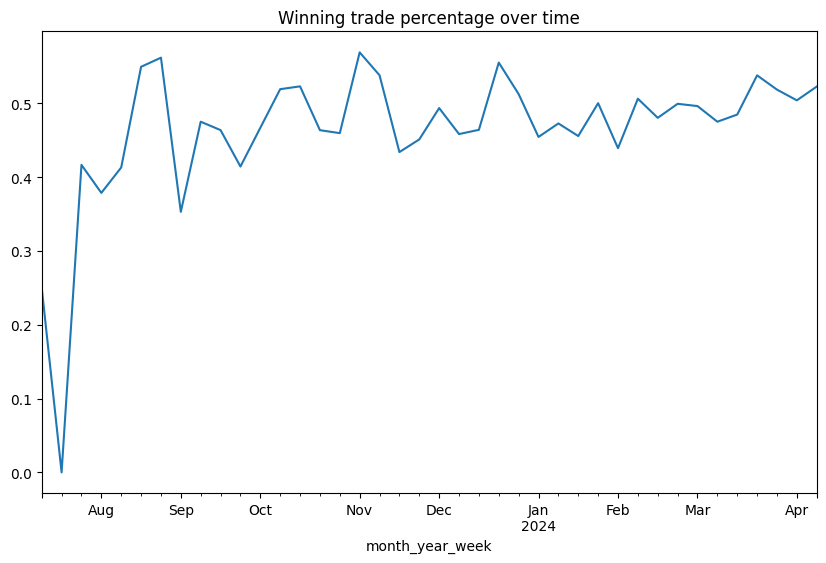

In [67]:
all_trades.groupby('month_year_week')['winning_trade'].mean().plot(title='Winning trade percentage over time', figsize=(10,6))

<Axes: title={'center': 'Mechanical calls over time'}, xlabel='month_year_week'>

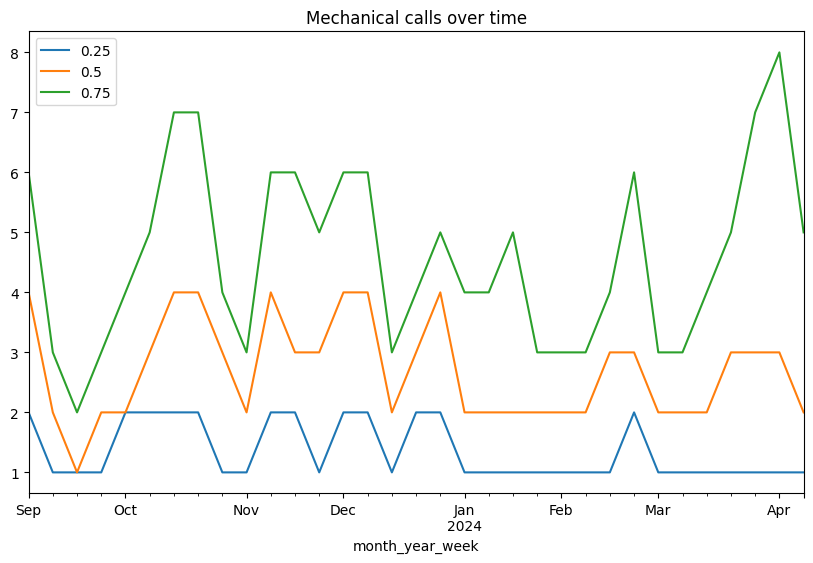

In [68]:
#only plot from september 2023
all_trades[all_trades['creation_timestamp'] > '2023-09-01'].groupby('month_year_week')['num_mech_calls'].quantile([0.25, 0.5, 0.75]).unstack().plot(title='Mechanical calls over time', figsize=(10,6)) 

<Axes: title={'center': 'Collateral amount quantiles over time'}, xlabel='month_year_week'>

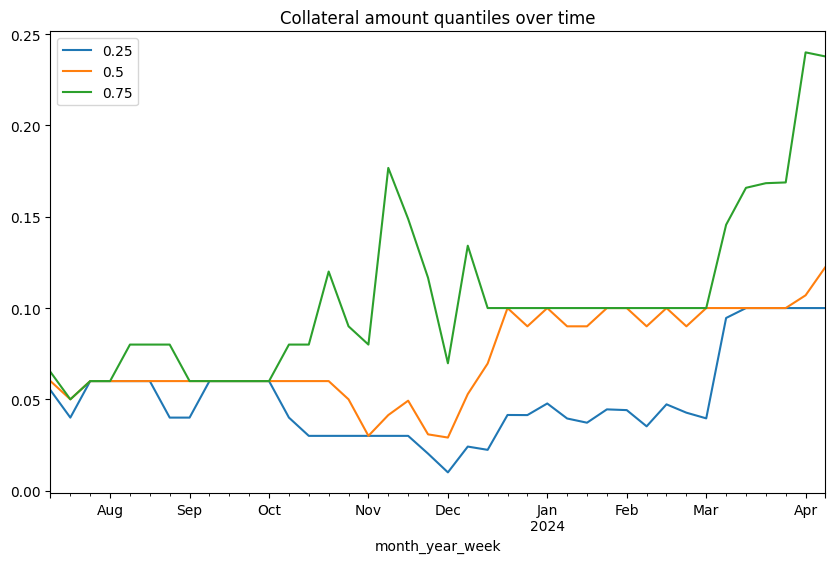

In [69]:
all_trades.groupby('month_year_week')['collateral_amount'].quantile([0.25, 0.5, 0.75]).unstack().plot(title='Collateral amount quantiles over time', figsize=(10,6))

<Axes: title={'center': 'Earnings quantiles over time'}, xlabel='month_year_week'>

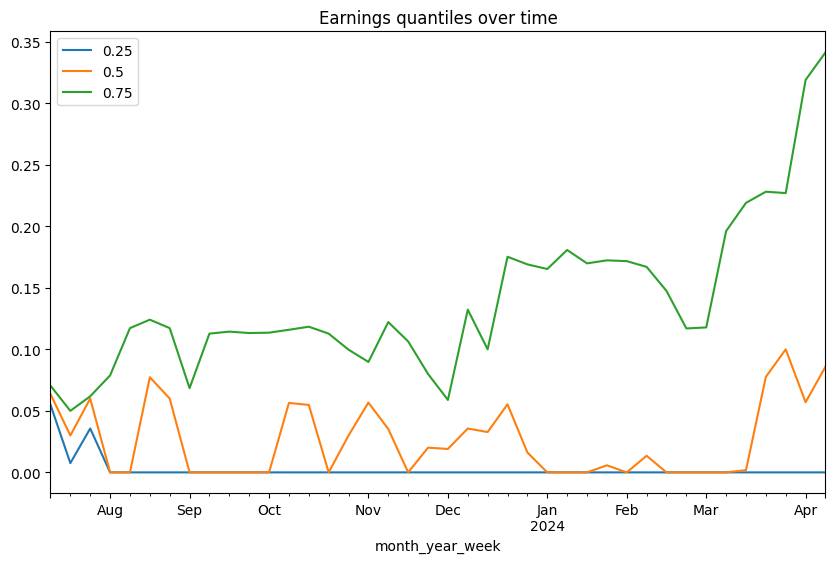

In [70]:
all_trades.groupby('month_year_week')['earnings'].quantile([0.25, 0.5, 0.75]).unstack().plot(title='Earnings quantiles over time', figsize=(10,6))

<Axes: title={'center': 'Net earnings quantiles over time'}, xlabel='month_year_week'>

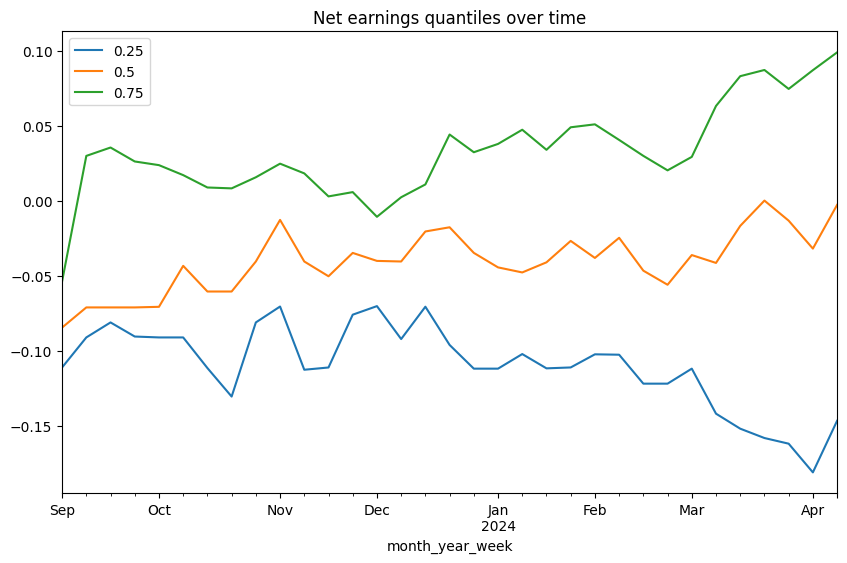

In [71]:
# plot new earnings from september 2023
all_trades[all_trades['creation_timestamp'] > '2023-09-01'].groupby('month_year_week')['net_earnings'].quantile([0.25, 0.5, 0.75]).unstack().plot(title='Net earnings quantiles over time', figsize=(10,6))

<Axes: title={'center': 'ROI quantiles over time'}, xlabel='month_year_week'>

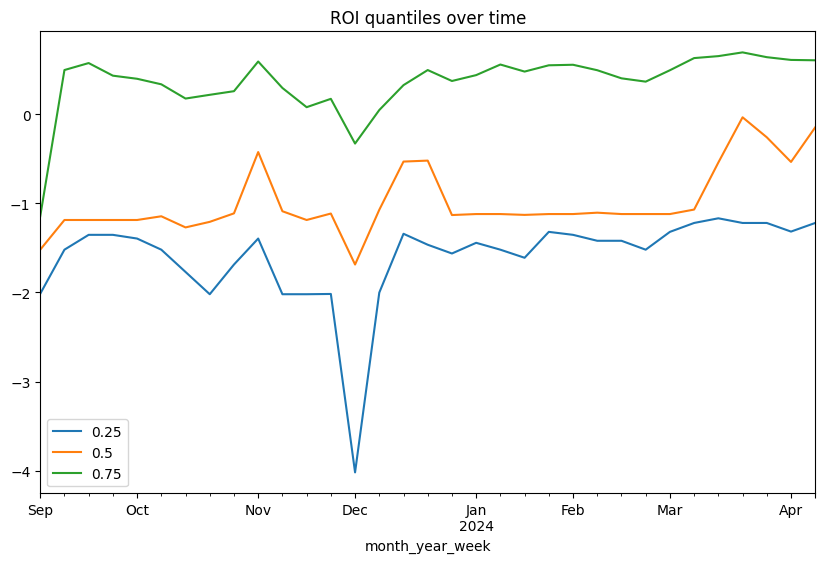

In [72]:
# roi from september 2023
all_trades[all_trades['creation_timestamp'] > '2023-09-01'].groupby('month_year_week')['roi'].quantile([0.25, 0.5, 0.75]).unstack().plot(title='ROI quantiles over time', figsize=(10,6))


In [26]:
del all_trades
gc.collect()

5

In [27]:
del tools
gc.collect()

0